<a href="https://colab.research.google.com/github/Arseniy-Polyakov/statistics/blob/main/Statistics_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Устанавливаем небходимые библиотеки для работы с данными

In [ ]:
install.packages("readr")
library(ggplot2)
library(dplyr)
library(readr)

1. Построить графики распределений для переменных оценки имплицитного отношения и трех эксплицитных шкал
Переменные оценки имплицитного отношения: CB_IAT2 (результат теста IAT для контрольной группы 2),
CB_IAT4 (результат теста IAT для контрольной группы 4)
Переменные эксплицитных шкал: valence (эмоциональная окраска стимула),
veracity (правдивость, точность информации),
performance rate1 (Производительность или результат выполнения задания)

Загружаем датасет и получаем доступ к переменным veracity, valence, performance

In [ ]:
eye0 <- read_delim("/content/Eye_movement_dataset.csv",
                   delim = ";")

options(max.print=1000)

veracity <- eye0$Veracity
valence <- eye0$Valence
performance <- eye0$Performance.Rate1

Строим график распределения для переменной veracity

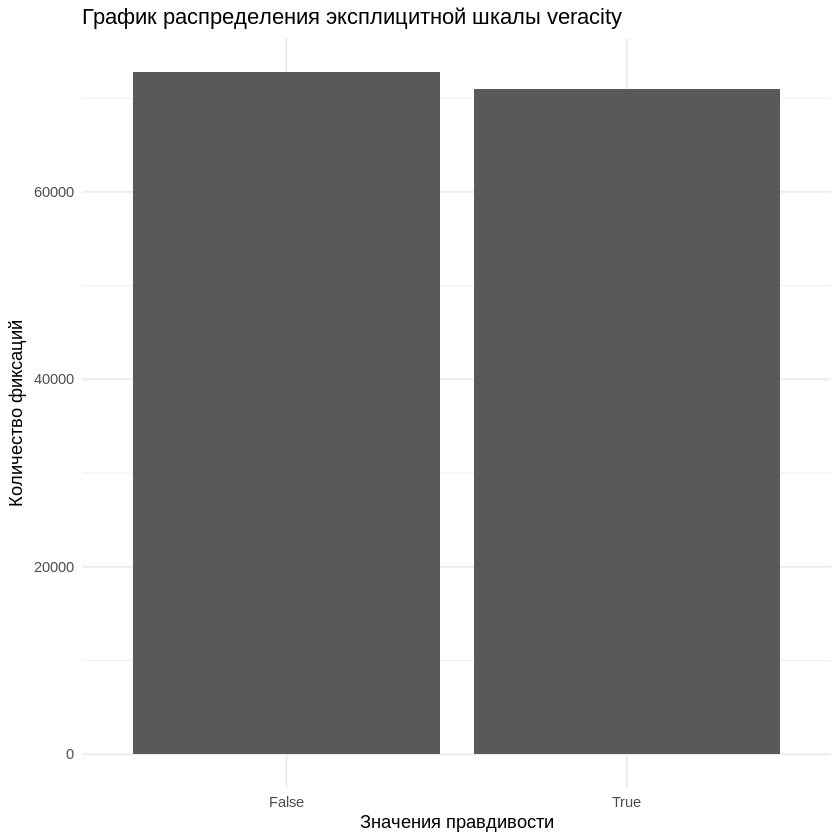

In [8]:
veracity_counts <- eye0 %>%
  group_by(Veracity) %>%
  summarise(count = n())

ggplot(veracity_counts, aes(x=factor(Veracity, levels=c(1, 2), labels=c("False", "True")), y=count)) +
  geom_bar(stat="identity") +
  labs(title="График распределения эксплицитной шкалы veracity",
       x="Значения правдивости",
       y="Количество фиксаций") +
  theme_minimal()

Строим график распределения для переменной valence

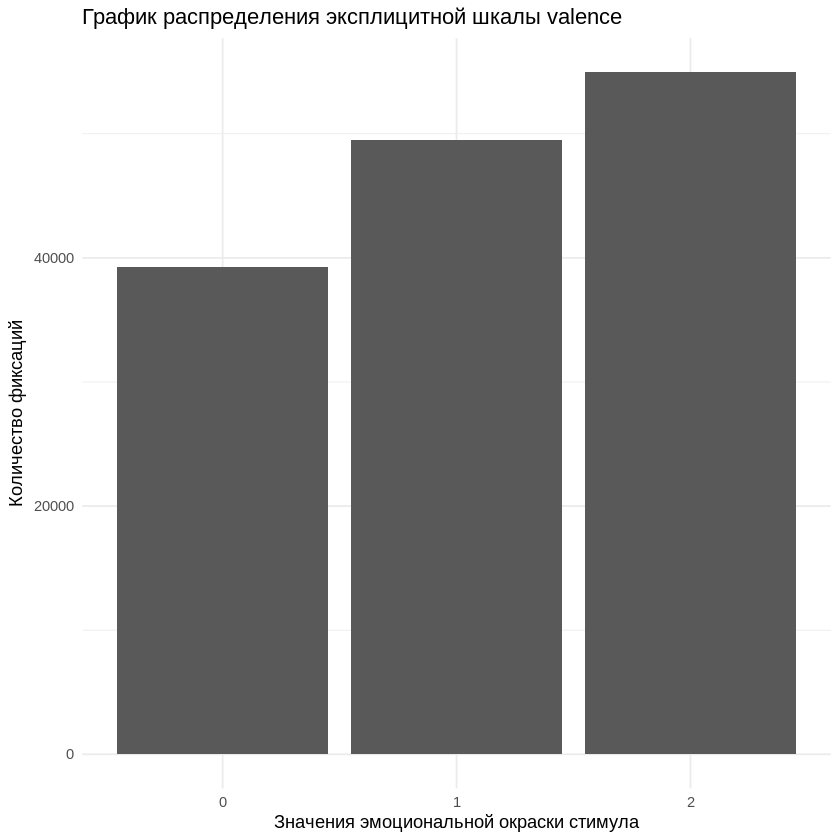

In [9]:
valence_counts <- eye0 %>%
  group_by(Valence) %>%
  summarise(count = n())

ggplot(valence_counts, aes(x=factor(Valence, levels=c(0, 1, 2)), y=count)) +
  geom_bar(stat="identity") +
  labs(title="График распределения эксплицитной шкалы valence",
       x="Значения эмоциональной окраски стимула",
       y="Количество фиксаций") +
  theme_minimal()

Строим график распределения для переменной performance

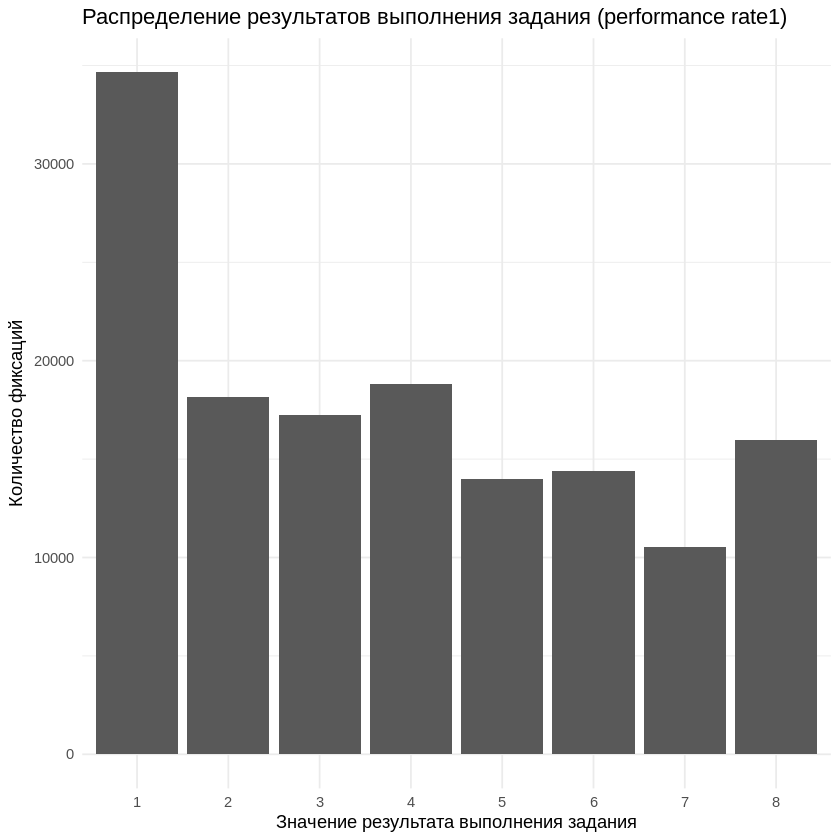

In [36]:
performance_grouped <- eye0 %>%
  group_by(`Performance Rate1`) %>%
  summarise(count = n())

ggplot(performance_grouped, aes(x=factor(`Performance Rate1`), y=count)) +
  geom_bar(stat="identity") +
  labs(title="Распределение результатов выполнения задания (performance rate1)",
       x="Значение результата выполнения задания",
       y="Количество фиксаций") +
  theme_minimal()

Распределение теста IAT для контрольной группы 2

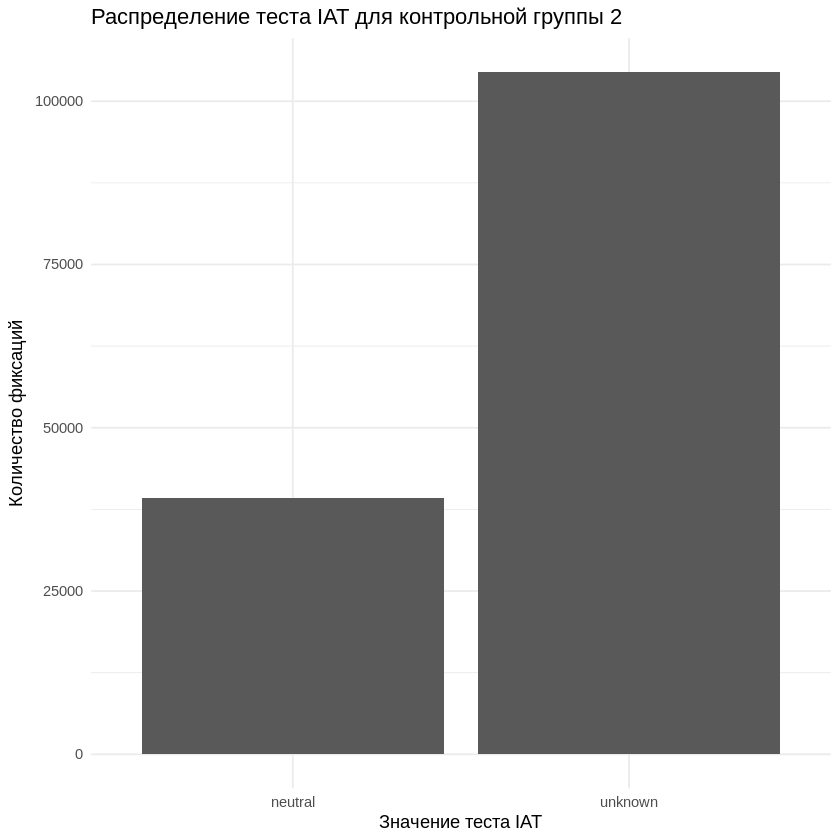

In [17]:
CB_IAT2_grouped <- eye0 %>%
  group_by(CB_IAT2) %>%
  summarise(count = n())

neutral <- CB_IAT2_grouped$count[CB_IAT2_grouped$CB_IAT2 == "neutral"]
unknown <- CB_IAT2_grouped$count[CB_IAT2_grouped$CB_IAT2 == "unknown"]

ggplot(data.frame(Value = c("neutral", "unknown"), Count = c(neutral, unknown)), aes(x=Value, y=Count)) +
  geom_bar(stat="identity") +
  labs(title="Распределение теста IAT для контрольной группы 2",
       x="Значение теста IAT",
       y="Количество фиксаций") +
  theme_minimal()

Распределение теста IAT для контрольной группы 2

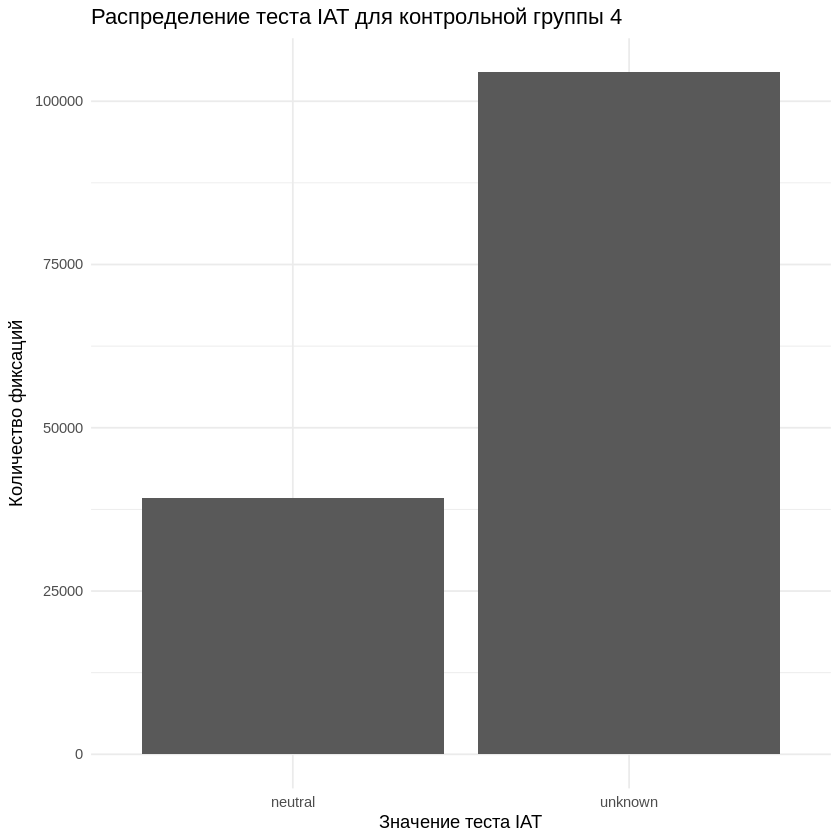

In [25]:
CB_IAT4_grouped <- eye0 %>%
  group_by(CB_IAT4) %>%
  summarise(count = n())

neutral <- CB_IAT4_grouped$count[CB_IAT4_grouped$CB_IAT4 == "neutral"]
unknown <- CB_IAT4_grouped$count[CB_IAT4_grouped$CB_IAT4 == "unknown"]

ggplot(data.frame(Value = c("neutral", "unknown"), Count = c(neutral, unknown)), aes(x=Value, y=Count)) +
  geom_bar(stat="identity") +
  labs(title="Распределение теста IAT для контрольной группы 4",
       x="Значение теста IAT",
       y="Количество фиксаций") +
  theme_minimal()

2. Построить распределение переменной общего времени фиксаций
Название переменной: duration (общее время фиксации)

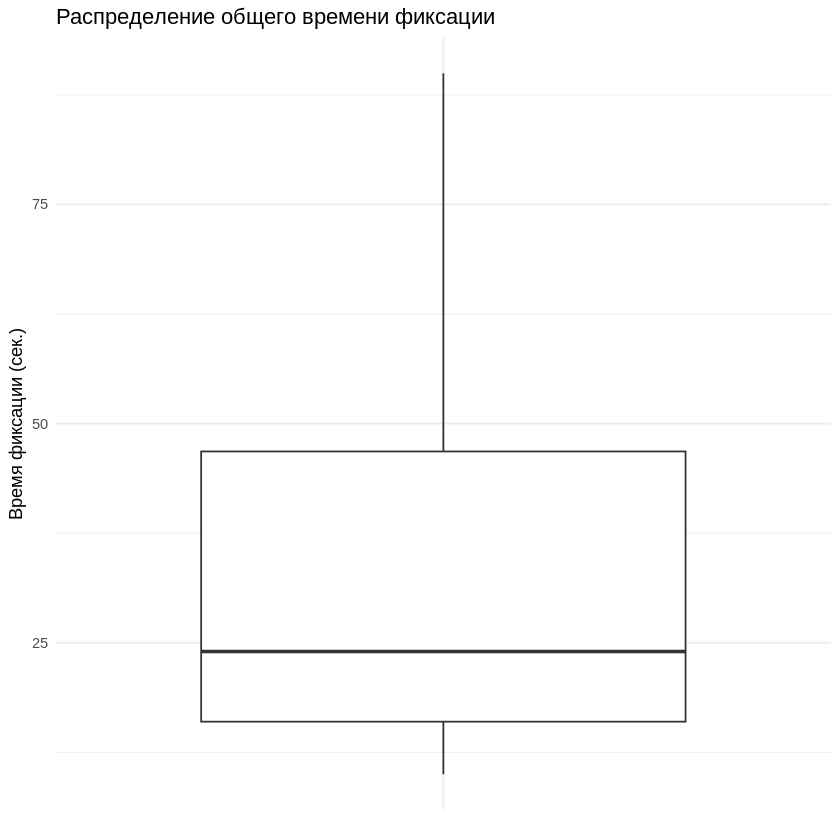

In [34]:
eye0$Duration <- as.numeric(eye0$Duration)
duration <- eye0$Duration[eye0$Duration < 90] # эксприментальным путем определяем значение, свыше которого находится большое количество выбросов и удаляем выбросы из выборки

ggplot(data.frame(Duration = duration), aes(x = "", y = Duration)) +
  geom_boxplot() +
  labs(title = "Распределение общего времени фиксации",
       y = "Время фиксации (сек.)") +
  theme_minimal() +
  theme(axis.title.x = element_blank())

3. Рассчитать меры центральных тенденций
(Эти меры называются: мода, медиана, среднее арифметическое). Считаем для переменной duration без выбросов

In [35]:
function_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
mode_duration <- function_mode(duration)
median_duration <- round(median(duration), 2)
mean_duration <- round(mean(duration), 2)

print(as.numeric(mode_duration))
print(median_duration)
print(mean_duration)

[1] 12
[1] 24
[1] 32.38


4. Рассчитать показатели разброса
(Эти показатели: размах, дисперсия, стандартное отклонение, стандартная ошибка среднего). Считаем для переменной duration без выбросов

In [36]:
range_duration <- round(max(duration) - min(duration), 2)
dispersion_duration <- round(var(duration), 2)
std_duration <- round(sd(duration), 2)
std_error_duration <- round(sd(duration) / sqrt(length(duration)), 2)

print(range_duration)
print(dispersion_duration)
print(std_duration)
print(std_error_duration)

[1] 79.95
[1] 408.36
[1] 20.21
[1] 0.06
